In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import datetime

from nowcast import analyze
from salishsea_tools import viz_tools, psu_tools, grid_tools, tidetools

import conversion, pressure

import glob 
%matplotlib inline

In [2]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')



In [3]:
def conversion_in_region_and_time(jss,iss, d1, d2, grid, mesh_mask):
    #load grids
    bathy, lons, lats = tidetools.get_bathy_data(grid)
    bathy = bathy[jss[0]:jss[-1]+1, iss[0]:iss[-1]+1]
    lons = lons[jss[0]:jss[-1]+1, iss[0]:iss[-1]+1]
    lats = lats[jss[0]:jss[-1]+1, iss[0]:iss[-1]+1]
    grids = conversion.load_grids_subdomain(mesh_mask, jss, iss)
    # load files
    numdays = (d2-d1).days
    dates = [d1 + datetime.timedelta(days=num)
             for num in range(0, numdays+1)]
    dates.sort()
    filest = []
    filesu = []
    filesv = []
    for d in dates:
        dtstr =d.strftime('%Y%m%d')
        filest.append(glob.glob('/results/SalishSea/nowcast/*/SalishSea_1h_{}_{}_grid_T.nc'.format(dtstr,dtstr))[0])
        filesu.append(glob.glob('/results/SalishSea/nowcast/*/SalishSea_1h_{}_{}_grid_U.nc'.format(dtstr,dtstr))[0])
        filesv.append(glob.glob('/results/SalishSea/nowcast/*/SalishSea_1h_{}_{}_grid_V.nc'.format(dtstr,dtstr))[0])
    # data    
    sal, time = analyze.combine_files(filest,'vosaline',np.arange(40), jss, iss)
    temp, time = analyze.combine_files(filest,'votemper',np.arange(40),jss, iss)
    v, time = analyze.combine_files(filesv,'vomecrty',np.arange(40),jss, iss)
    u, time = analyze.combine_files(filesu,'vozocrtx',np.arange(40),jss, iss)
    ssh, time = analyze.combine_files(filest,'sossheig','None', jss, iss)
    rho = psu_tools.calculate_density(temp,sal)
    wb = conversion.barotropic_w(u, v, ssh, bathy, grids)
    # time dependent grids
    grids_t = grid_tools.calculate_time_dependent_grid(grids['e3t_0'][0,...], 
                                                   grids['tmask'][0,...], 
                                                   ssh, 
                                                   {'e3t_0': grids['e3t_0'], 
                                                    'gdept_0': grids['gdept_0']} )
    #pressure
    p = pressure.hydrostatic_pressure(rho, 
                                      grids_t['e3t_t'], 
                                      grids_t['gdept_t'], 
                                      grids['tmask'])
    p_it = pressure.internal_tide_pressure(p, 
                                           grids_t['e3t_t'], 
                                           grids['tmask'])
    # conversion
    mbathy = mesh_mask.variables['mbathy'][0,jss[0]:jss[-1]+1,iss[0]:iss[-1]+1]
    CT = conversion.conversion_CT(wb, p_it, mbathy)
    
    return CT, lons, lats, 

# Time period

In [21]:
d1=datetime.datetime(2015,1,1)
d2=datetime.datetime(2015,1,4)

# CODAR region 

In [22]:
jmin = 379
jmax = 461
imin = 236
imax = 321
jss = np.arange(jmin, jmax)
iss = np.arange(imin, imax)

In [23]:
CTs={}
lons_sub = {}
lats_sub = {}
CTs['CODAR'], lons_sub['CODAR'], lats_sub['CODAR'] = conversion_in_region_and_time(jss,iss,d1,d2,grid,mesh_mask)

/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


# Boundary Pass

In [24]:
jmin = 200
jmax = 380
imin = 250
imax = 330

jss = np.arange(jmin, jmax)
iss = np.arange(imin, imax)

CTs['BP'], lons_sub['BP'], lats_sub['BP'] = conversion_in_region_and_time(jss,iss,d1,d2,grid,mesh_mask)

/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


# Victoria

In [25]:
jmin = 200
jmax = 380
imin = 171
imax = 251

jss = np.arange(jmin, jmax)
iss = np.arange(imin, imax)

CTs['Victoria'], lons_sub['Victoria'], lats_sub['Victoria'] = conversion_in_region_and_time(jss,iss,d1,d2,grid,mesh_mask)

/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


# Juan de Fuca

In [26]:
jmin = 220
jmax = 360
imin = 100
imax = 172


jss = np.arange(jmin, jmax)
iss = np.arange(imin, imax)

CTs['JDF'], lons_sub['JDF'], lats_sub['JDF'] = conversion_in_region_and_time(jss,iss,d1,d2,grid,mesh_mask)

/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


# North SoG

In [27]:
jmin = 462
jmax = 600
imin = 100
imax = 300


jss = np.arange(jmin, jmax)
iss = np.arange(imin, imax)

CTs['NSoG'], lons_sub['NSoG'], lats_sub['NSoG'] = conversion_in_region_and_time(jss,iss,d1,d2,grid,mesh_mask)

/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


July 2016

(47.5, 49.8)

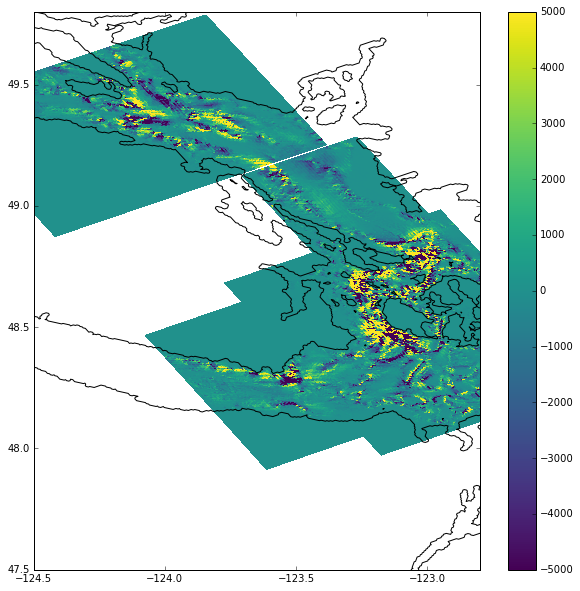

In [11]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
t=120
for key in CTs:
    #Average over 6 M2 tidal cycles
    mean_CT = np.mean(CTs[key][:75], axis=0)
    mesh= ax.pcolormesh(lons_sub[key],
                        lats_sub[key],
                        mean_CT,
                        vmin = -5000,
                        vmax=5000,
                        cmap = 'viridis')
viz_tools.plot_coastline(ax,grid,coords='map')
plt.colorbar(mesh,ax=ax)
ax.set_xlim([-124.5,-122.8])
ax.set_ylim([47.5, 49.8])


July 2015

(47.5, 49.8)

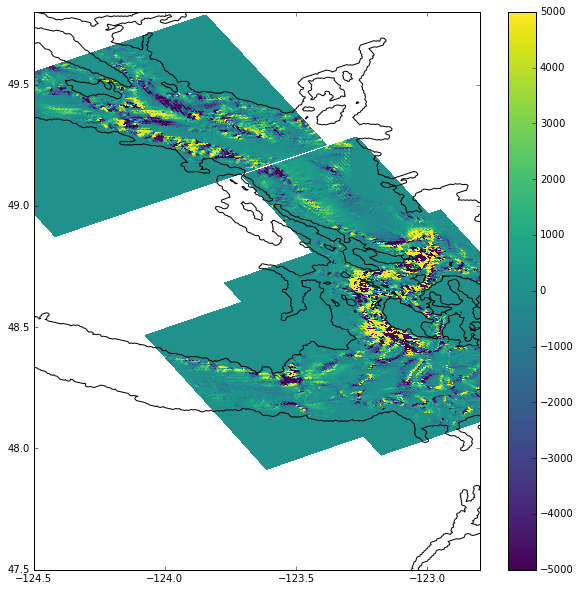

In [20]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
t=120
for key in CTs:
    #Average over 6 M2 tidal cycles
    mean_CT = np.mean(CTs[key][:75], axis=0)
    mesh= ax.pcolormesh(lons_sub[key],
                        lats_sub[key],
                        mean_CT,
                        vmin = -5000,
                        vmax=5000,
                        cmap = 'viridis')
viz_tools.plot_coastline(ax,grid,coords='map')
plt.colorbar(mesh,ax=ax)
ax.set_xlim([-124.5,-122.8])
ax.set_ylim([47.5, 49.8])


Jan 2015

(47.5, 49.8)

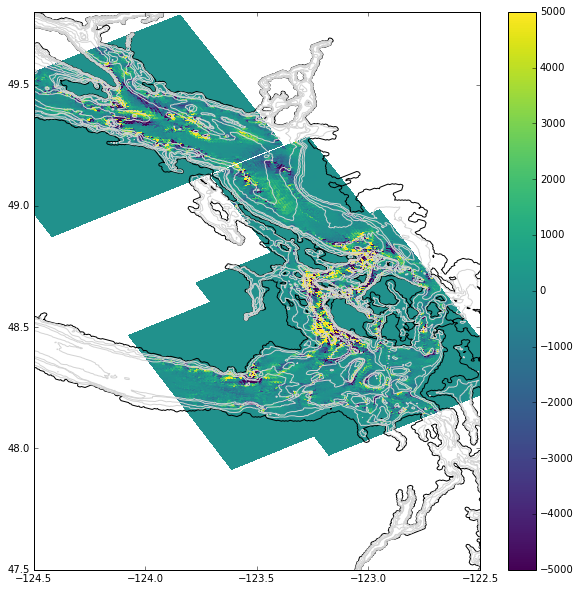

In [37]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
t=120
for key in CTs:
    #Average over 6 M2 tidal cycles
    mean_CT = np.mean(CTs[key][:75], axis=0)
    mesh= ax.pcolormesh(lons_sub[key],
                        lats_sub[key],
                        mean_CT,
                        vmin = -5000,
                        vmax=5000,
                        cmap = 'viridis')
viz_tools.plot_coastline(ax,grid,coords='map')
viz_tools.plot_coastline(ax,grid,coords='map', isobath=20,color='lightgray')
viz_tools.plot_coastline(ax,grid,coords='map', isobath=50,color='lightgray')
viz_tools.plot_coastline(ax,grid,coords='map', isobath=100,color='lightgray')
viz_tools.plot_coastline(ax,grid,coords='map', isobath=120,color='lightgray')
viz_tools.plot_coastline(ax,grid,coords='map', isobath=200,color='lightgray')
viz_tools.plot_coastline(ax,grid,coords='map', isobath=300,color='lightgray')
plt.colorbar(mesh,ax=ax)
ax.set_xlim([-124.5,-122.5])
ax.set_ylim([47.5, 49.8])